In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_excel('/content/Airbnb NYC 2019.xlsx')
dataset.head()

In [ ]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())


Rows :  48895

Columns : 16

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
 
Unique:
 id                                48895
name                              47892
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [ ]:
dataset.fillna({'reviews_per_month':0},inplace=True)

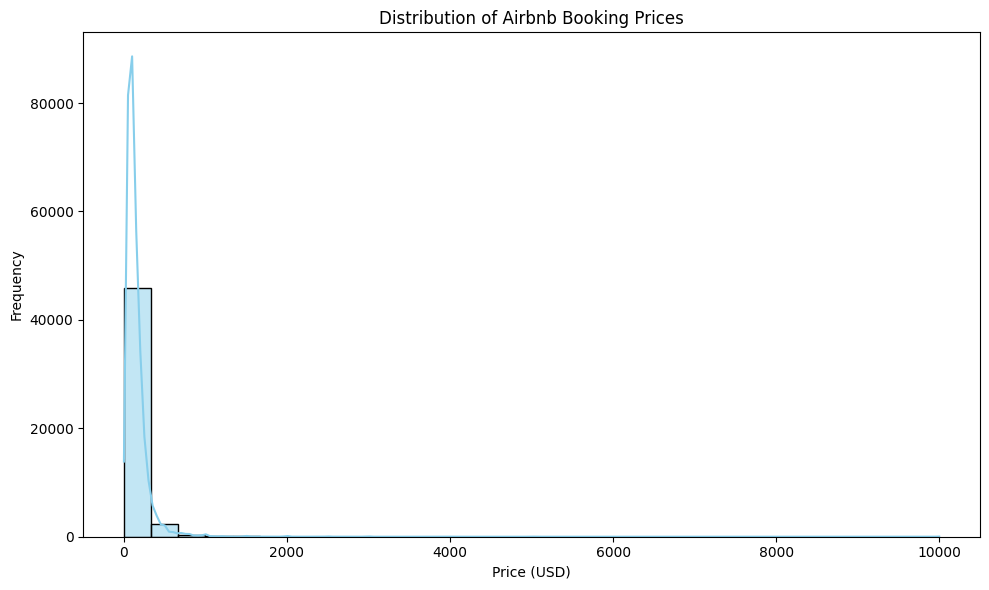

In [ ]:

'''(1) Find Distribution Of Airbnb Bookings Price Range.'''
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='price', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Airbnb Booking Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
'''(2) Find Total Listing/Property count in Each Neighborhood Group in NYC.'''
# Group the DataFrame by neighborhood group
grouped_df = dataset.groupby("neighbourhood_group")

# Count the number of listings in each neighborhood group
listing_counts = grouped_df["id"].count()

# Print the results
print(listing_counts)

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64


In [ ]:

#(3) Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhoods.
# Group the DataFrame by neighborhood group and neighborhood
grouped_df = dataset.groupby(["neighbourhood_group", "neighbourhood"])

# Calculate the average price for each group
average_prices = grouped_df["price"].mean()

# Print the results
print(average_prices)

neighbourhood_group  neighbourhood
Bronx                Allerton          87.595238
                     Baychester        75.428571
                     Belmont           77.125000
                     Bronxdale         57.105263
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
                     Woodrow          700.000000
Name: price, Length: 221, dtype: float64


In [ ]:
#(4) Find Top Neighborhoods and Hosts by Listing/property in entire NYc

# Find the top 10 neighborhoods with the most listings
top_neighborhoods = dataset["neighbourhood"].value_counts().head(10)

# Find the top 10 hosts with the most listings
top_hosts = dataset["host_id"].value_counts().head(10)

# Print the results
print("Top 10 Neighborhoods by Listing Count:")
print(top_neighborhoods)

print("\nTop 10 Hosts by Listing Count:")
print(top_hosts)

Top 10 Neighborhoods by Listing Count:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Top 10 Hosts by Listing Count:
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [ ]:
#(5) Find the Number Of Active Hosts Per Location by Each Neighborhood Groups

# Group the DataFrame by neighborhood group and neighborhood
grouped_df = dataset.groupby(["neighbourhood_group", "neighbourhood"])

# Count the number of unique hosts in each neighborhood group and neighborhood
host_counts = grouped_df["host_id"].nunique().reset_index(name='Number_of_Active_Hosts')

# Print the results
print("Number of Active Hosts Per Location by Each Neighborhood Group:")
print(host_counts)

Number of Active Hosts Per Location by Each Neighborhood Group:
    neighbourhood_group  neighbourhood  Number_of_Active_Hosts
0                 Bronx       Allerton                      27
1                 Bronx     Baychester                       5
2                 Bronx        Belmont                      19
3                 Bronx      Bronxdale                      18
4                 Bronx    Castle Hill                       3
..                  ...            ...                     ...
216       Staten Island    Tottenville                       6
217       Staten Island  West Brighton                       9
218       Staten Island    Westerleigh                       2
219       Staten Island    Willowbrook                       1
220       Staten Island        Woodrow                       1

[221 rows x 3 columns]


In [ ]:
#(6) Find Total Counts Of Each Room Types in entire NYC.
room_type_counts = dataset["room_type"].value_counts()

# Print the results
print("Total Counts of Each Room Type in Entire NYC:")
print(room_type_counts)

Total Counts of Each Room Type in Entire NYC:
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [ ]:
#(7) Find Stay Requirement counts by Minimum Nights.
stay_requirement_counts = dataset["minimum_nights"].value_counts().sort_index()

# Print the results
print("Stay Requirement Counts by Minimum Nights:")
print(stay_requirement_counts)

Stay Requirement Counts by Minimum Nights:
1       12720
2       11696
3        7999
4        3303
5        3034
        ...  
480         1
500         5
999         3
1000        1
1250        1
Name: minimum_nights, Length: 109, dtype: int64


In [ ]:
#(8) Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.
grouped_df = dataset.groupby("neighbourhood_group")

# Aggregate the total number of reviews and maximum reviews by each neighborhood group
neighborhood_reviews = grouped_df.agg({'number_of_reviews': 'sum', 'reviews_per_month': 'max'}).reset_index()

# Rename columns for clarity
neighborhood_reviews.rename(columns={'number_of_reviews': 'Total_Reviews', 'reviews_per_month': 'Max_Reviews_Per_Month'}, inplace=True)

# Print the results
print("Total Numbers of Reviews and Maximum Reviews by Each Neighborhood Group:")
print(neighborhood_reviews)

Total Numbers of Reviews and Maximum Reviews by Each Neighborhood Group:
  neighbourhood_group  Total_Reviews  Max_Reviews_Per_Month
0               Bronx          28371                  10.34
1            Brooklyn         486574                  14.00
2           Manhattan         454569                  58.50
3              Queens         156950                  20.94
4       Staten Island          11541                  10.12


In [ ]:
#(9) Find Most reviewed room type in Neighborhood groups per month.
# Assuming 'dataset' is your DataFrame containing the Airbnb data
# Convert the 'last_review' column to datetime format
dataset["date"] = pd.to_datetime(dataset["last_review"])

# Extract the month from the date and create a new column 'Month'
dataset['Month'] = dataset['date'].dt.month

# Group the DataFrame by 'neighbourhood_group', 'Month', and 'room_type' and count the number of reviews
grouped_reviews = dataset.groupby(['neighbourhood_group', 'Month', 'room_type']).size().reset_index(name='Review_count')

# Find the most reviewed room type in each neighborhood group per month
most_reviewed_room_type = grouped_reviews.loc[grouped_reviews.groupby(['neighbourhood_group', 'Month'])['Review_count'].idxmax()]

# Print the results
print("Most reviewed room type in neighborhood groups per month:")
print(most_reviewed_room_type)

Most reviewed room type in neighborhood groups per month:
    neighbourhood_group  Month        room_type  Review_count
1                 Bronx    1.0     Private room            37
4                 Bronx    2.0     Private room            11
7                 Bronx    3.0     Private room            14
10                Bronx    4.0     Private room            23
13                Bronx    5.0     Private room            71
16                Bronx    6.0     Private room           220
18                Bronx    7.0  Entire home/apt            84
22                Bronx    8.0     Private room            16
24                Bronx    9.0     Private room            11
27                Bronx   10.0     Private room            17
29                Bronx   11.0  Entire home/apt             8
33                Bronx   12.0     Private room            19
36             Brooklyn    1.0     Private room           602
39             Brooklyn    2.0     Private room           179
42          

In [ ]:
#(10) Find Best location listing/property location for travelers.


# Group the DataFrame by neighbourhood group
grouped_df = dataset.groupby("neighbourhood_group")

# Calculate the average review score for each group
average_review_scores = grouped_df["number_of_reviews"].mean()

# Find the neighbourhood group with the highest average review score
best_location = average_review_scores.sort_values(ascending=False).index[0]

# Print the results
print("Best Location Listing/Property Location for Travelers:")
print(best_location)



Best Location Listing/Property Location for Travelers:
Staten Island


In [ ]:
#(11) Find also best location listing/property location for Hosts.
# Group the DataFrame by host id and neighbourhood group
grouped_df = dataset.groupby(["host_id", "neighbourhood_group"])

# Calculate the average price for each group
average_prices = grouped_df["price"].mean()

# Find the neighbourhood group with the highest average price for each host
best_locations = average_prices.groupby(level=0).idxmax()

# Print the results
print("Best Location Listing/Property Location for Hosts:")
print(best_locations)


Best Location Listing/Property Location for Hosts:
host_id
2438               (2438, Brooklyn)
2571               (2571, Brooklyn)
2787               (2787, Brooklyn)
2845              (2845, Manhattan)
2868               (2868, Brooklyn)
                      ...          
274273284    (274273284, Manhattan)
274298453     (274298453, Brooklyn)
274307600     (274307600, Brooklyn)
274311461    (274311461, Manhattan)
274321313    (274321313, Manhattan)
Name: price, Length: 37457, dtype: object


In [ ]:
#(12) Find Price variations in NYC Neighborhood groups.

# Calculate summary statistics of prices for each neighborhood group
neighborhood_price_stats = dataset.groupby("neighbourhood_group")["price"].describe()

# Print the results
print("Price Variations in NYC Neighborhood Groups:")
print(neighborhood_price_stats)

Price Variations in NYC Neighborhood Groups:
                       count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0  
